In [142]:

from IPython.display import IFrame
IFrame('https://images.unsplash.com/photo-1517209806898-2be0a0caf519?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1934&q=80', 
       width = 620, height = 450)

<h2>Acknowledgement

<h4>This Analysis would have not been possible without the data set uploaded by @Dgomonov. It would be awesome if you upvote his dataset.

<h2> Introduction


* We often book our hotel or stays while we travel to some place and we dont know whats the prices and the location. This is the analysis i did of one of the finest cities of the world New York.

<h2> AirBnB New York, EDA
    
    
   <h4> overview & PreProcessing   
    
    
   <h4>  1.Importing Datasets and Libraries

   <h4>  1.1 Overview
       
   <h4>  understanding and knowing data       
       
   <h4>  2.handling Missing Data
   <h4>  2.1 Drop Unnessesary data
   <h4>  2.2 Drop NaN
   <h4>  2.2 Fill NaN
    

<h2> Importing Dataset and Libraries


* Importing the datasets from the kaggle through api.
* Importing the Libraries which will be needed for data cleaning, analyzing and visualising.

In [ ]:
import opendatasets as od
URL = 'https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data'
od.download(URL)

* Imported datasets from Kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
ny = pd.read_csv('.\\new-york-city-airbnb-open-data\\AB_NYC_2019.csv')

***


<h3>Understanding and knowing the data.

Before we begin our analysis its important we should know our data.

In [4]:
ny.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

* From the above data we can understand that there are some nan values present on some data
* there are 15 columns with 48895 entries



Lets see the stats of the data and understand the numbers



In [6]:
ny.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


From the above obesrvation we found out there some missing values on the reviews_per_month

Lets find the null values on the dataset

In [7]:
ny.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We observed there are some missing values and the columns which will not be needed for our analysis.

* id 
* name
* host_name
* last_review

we are dropping these values because of confidentiality and not nessasary data. Its not needed for my analysi.

<h3> Handling the missing data.

In [9]:
ny.drop(['id','name','host_name','last_review'], axis= 1, inplace=True)

In [10]:
ny.reviews_per_month.fillna(0, inplace =True)

In [11]:
ny.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
ny.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Question Asked

1. most reviews
2. maximum price
3. Top 10 Host in NY.
4. Top 10 most visited AirBnb
5. most preferd room_type
6. maximum nights


<h3> Exploratory Data Analysis

In [13]:
ny.host_id.value_counts(ascending = False).head(10)

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [14]:
ny.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [15]:
ny.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Woodrow                  1
New Dorp                 1
Richmondtown             1
Fort Wadsworth           1
Rossville                1
Name: neighbourhood, Length: 221, dtype: int64

In [16]:
ny.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [17]:
ny.price.value_counts()

100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
463        1
266        1
453        1
1306       1
1749       1
Name: price, Length: 674, dtype: int64

In [18]:
ny.minimum_nights.value_counts().max()

12720

In [19]:
Vis = ny.host_id.value_counts().head(10)
Vis

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [20]:
top = pd.DataFrame(Vis)
top.reset_index(inplace = True)
top.rename(columns = {'index': 'Host_ID', 'host_id': 'Count'}, inplace = True)
top

,Host_ID,Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


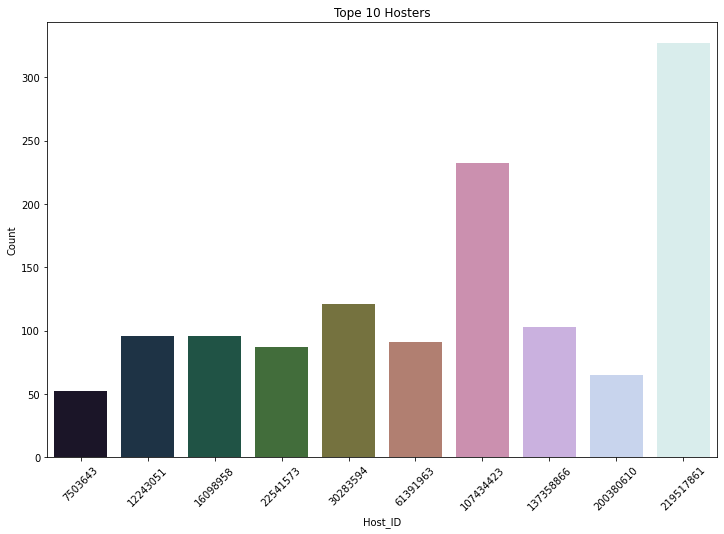

In [108]:
plt.figure(figsize=(12,8))
plt.xticks(rotation = 45)
plt.title('Tope 10 Hosters')


sns.barplot( data = top,x = 'Host_ID', y = 'Count', palette = 'cubehelix');

In [40]:
sub_1=ny.loc[ny['neighbourhood_group'] == 'Brooklyn']
sub_2=ny.loc[ny['neighbourhood_group'] == 'Queens']
sub_3=ny.loc[ny['neighbourhood_group'] == 'Manhattan']
sub_4=ny.loc[ny['neighbourhood_group'] == 'Bronx']
sub_5=ny.loc[ny['neighbourhood_group'] ==  'Staten Island']

price_1=sub_1['price']
price_2=sub_2['price']
price_3=sub_3['price']
price_4=sub_4['price']
price_5=sub_5['price']

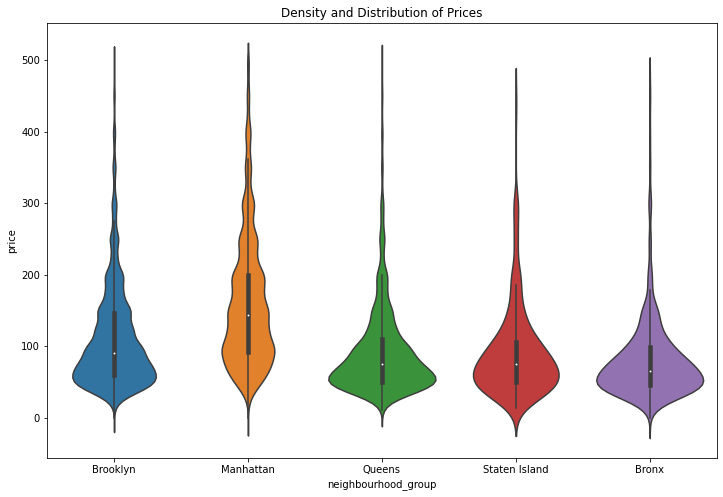

In [48]:
price_coll= ny[ny.price < 500]
plt.figure(figsize=(12,8))
sns.violinplot(data = price_coll, x = 'neighbourhood_group', y = 'price')
plt.title('Density and Distribution of Prices');


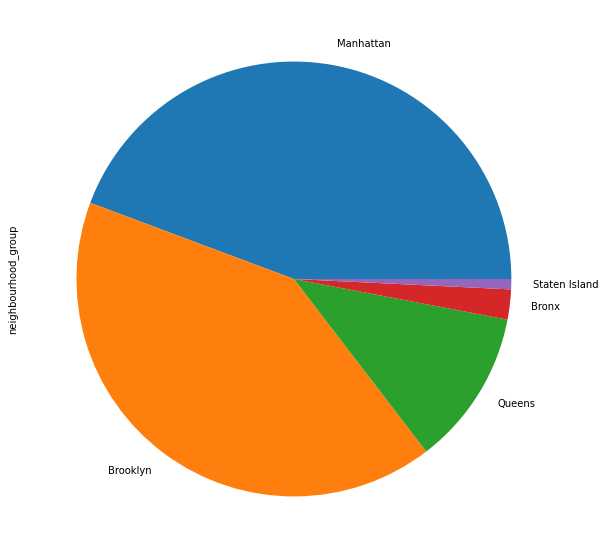

In [110]:
pien = ny.neighbourhood_group.value_counts()
plt.figure(figsize=(12,10))
plotpie = pien.plot.pie(x = 'pien', legend = False)

plotpie;

<h1> 10 nabourhood with most listing 
   

In [87]:
ny.neighbourhood.value_counts().head(10)


Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [92]:
sub8 = ny.loc[ny['neighbourhood'].isin (['Williamsburg',
                                      'Bedford-Stuyvesant',
                                      'Harlem','Bushwick',
                                      'Upper West Side',
                                      'Hell\'s Kitchen',
                                      'East Village',
                                      'Upper East Side',
                                      'Crown Heights',
                                      'Midtown'])]

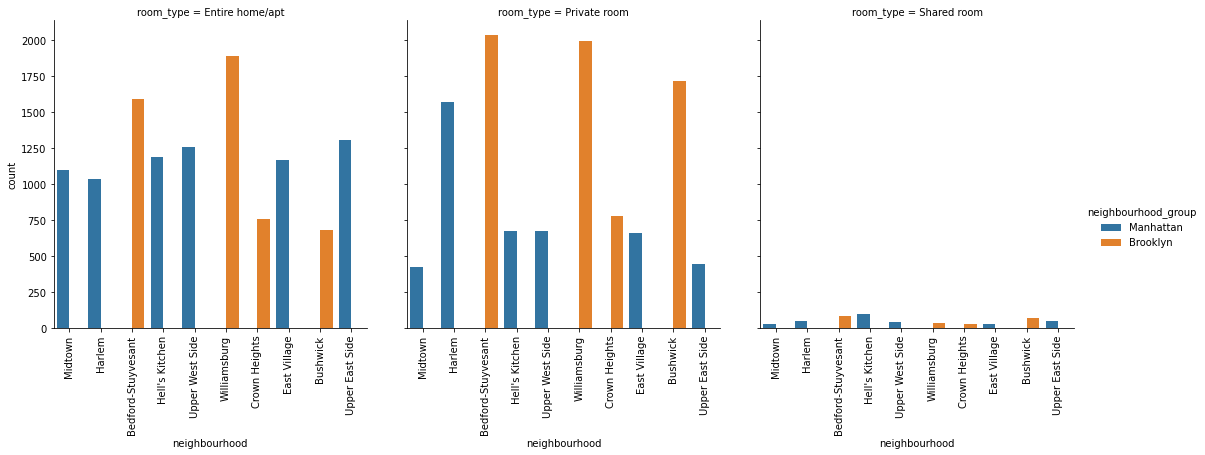

In [111]:
NH = sns.catplot(data = sub8, x='neighbourhood', hue='neighbourhood_group', col='room_type',kind='count')
NH.set_xticklabels(rotation = 'vertical');

<h1> Map plot for longitude and latitude

In [112]:
import urllib